### CNN convolution Layer(컨벌루션 뉴럴 네트워크)
* Convolution
    - padded
* Pooling
* flatten
* dense





In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
# 랜덤 시드 고정
tf.random.set_seed(123)

In [2]:
# 미 손글씨 숫자 데이터 6만개의 학습셋과 1만개의 테스트셋
# 데이터 가져오기
mnist=keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


X형태: (28, 28) y 형태: 5 x최대값: 255 x최소값: 0 y최대값: 9 y최소값: 0


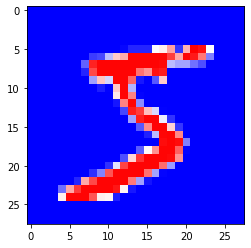

In [3]:
#28*28개의 이미지 데이터
print('X형태:',x_train[0].shape
      ,'y 형태:',y_train[0]
      ,'x최대값:',np.max(x_train[0])
      ,'x최소값:',np.min(x_train[0])
      ,'y최대값:',np.max(y_train)
      ,'y최소값:',np.min(y_train)
     )
plt.imshow(x_train[0],cmap='bwr')
plt.show()

In [4]:
x_train.shape[0]

60000

In [5]:
# minmax 처리 float32 정밀도 사용

X_train=x_train.reshape(x_train.shape[0],28,28,1).astype('float32')/255
X_test=x_test.reshape(x_test.shape[0],28,28,1).astype('float32')/255
X_train[0].dtype

dtype('float32')

값>>>>>>>>>: 5


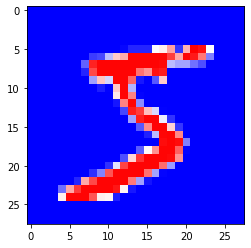

In [6]:
for i,img in enumerate(X_train[:1]):
    print('값>>>>>>>>>:',y_train[i])
    plt.imshow(img,cmap='bwr')
    plt.show()

In [7]:
# 입력데이터:784 출력데이터 1->10개로 변환
Y_train=keras.utils.to_categorical(y_train)
Y_test=keras.utils.to_categorical(y_test)
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [8]:
X_train.shape

(60000, 28, 28, 1)

In [9]:
inpshape=X_train[0].shape
inpshape

(28, 28, 1)

* Reshape(): 
    - keras.layers.Reshape((-1,28,28,1),input_shape=(28,28,)),
* Conv2D: 컨볼루션 2D->2D
    - kernel_size : 특징추출용 행렬 사이즈
    - padding: same: 테두리 가중치를 보장-> 이미지 사이즈가 줄지 않음
    - input_shape: 입력값
    - relu, 활성함수
* MaxPooling2D:맥스 풀링 2D->2D
    - 특징기반의 차원 축소
    - 해당크기의 큰값을 차원 축소
* Dropout: 비율
    - 특징기반의 과적합을 방지하기위해 일부노드 학습을 중지
* Flatten: 행렬 shape 변환
    - 2차원 행렬을 1차원으로 줄여서 구분에 용이하게 함
* Dense: 일반 딥러닝 레이어 
    - softmax: 활성함수중 최고 확률을가지는 값을 반환

In [10]:
keras.backend.clear_session()
# 모델 생성:sequential
model=keras.models.Sequential(
[
#keras.layers.Reshape((-1,28,28,1),input_shape=(28,28,)),
    keras.layers.Conv2D(32,
                        kernel_size=(5,5),
                        padding='same',
                        activation='relu',
                        input_shape=(28, 28,1)),
    keras.layers.Conv2D(32,
                        kernel_size=(5,5),
                        padding='same',
                        ),    
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.2),    
    keras.layers.Conv2D(16,
                        kernel_size=(5,5),
                        padding='same',
                        ),
    keras.layers.MaxPooling2D(pool_size=(2,2)),    
    keras.layers.Flatten(),

    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10,activation='softmax')
    # 출력데이터는 10개로 구분될것이다 one-hot
]
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        12816     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0

2021-12-24 12:27:12.894999: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-24 12:27:12.896524: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [12]:
from IPython.display import SVG
from tensorflow.keras.utils import plot_model,model_to_dot
#png로 만들기
#plot_model(model,to_file='img/cnnmodel.png',show_shapes=True)
# svg로 만들기
SVG(model_to_dot(model,show_shapes=True).create(prog='dot',format='svg'))

['dot', '-Tps', '/var/folders/_q/ls_vymhn1t5dvchk274ybs1m0000gn/T/tmpgui2oh30'] return code: -9

stdout, stderr:
 b''
b''



AssertionError: -9

In [13]:
# 모델 학습 과정을 설정: compile
model.compile(optimizer='ADAM' # Stochastic gradient descent 확률적 경사 하강법
              ,loss='MSE' # Mean Square Error
              ,metrics=['accuracy'] # 정확도
             )

In [14]:
# 학습하기: fit
hist=model.fit(X_train,Y_train,epochs=5,batch_size=100,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 311s 6ms/sample - loss: 0.0119 - accuracy: 0.9190 - val_loss: 0.0036 - val_accuracy: 0.9765
Epoch 2/5
48000/48000 [==============================] - 296s 6ms/sample - loss: 0.0040 - accuracy: 0.9738 - val_loss: 0.0027 - val_accuracy: 0.9825
Epoch 3/5
48000/48000 [==============================] - 298s 6ms/sample - loss: 0.0029 - accuracy: 0.9820 - val_loss: 0.0021 - val_accuracy: 0.9862
Epoch 4/5
48000/48000 [==============================] - 300s 6ms/sample - loss: 0.0024 - accuracy: 0.9848 - val_loss: 0.0021 - val_accuracy: 0.9867
Epoch 5/5
48000/48000 [==============================] - 296s 6ms/sample - loss: 0.0022 - accuracy: 0.9861 - val_loss: 0.0017 - val_accuracy: 0.9886


In [15]:
tloss,tacc=model.evaluate(X_test,Y_test)
print('손실값:',np.round(tloss,4),'정확도:',np.round(tacc,4))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================